In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from tqdm import tqdm
import scipy
import spiceypy as spice
import rebound
import reboundx
import matplotlib
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

plt.rc_context({'figure.facecolor':'white'})

import sys
sys.path.append('..')
from geminids.constants import *
from geminids.weights import *



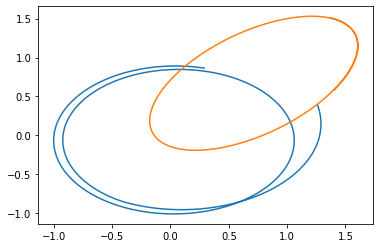

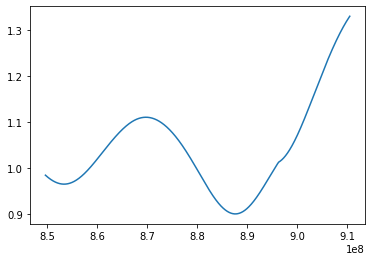

In [4]:
orbit = np.load('data/phaethon.npy')
psp2 = np.load('data/psp.npy')
t_act = np.load('data/t-3200.npy')
earth = spice.convrt(np.load('data/earth.npy'), "AU", "M")
dest = np.load("data/destiny.npy")
t_d = np.load("data/t-dest.npy")

# plt.plot(psp2[:,0], psp2[:,1], c = 'r')
plt.plot(dest[:,0], dest[:,1])
plt.plot(orbit[:,0,0], orbit[:,0,1])


plt.show()

plt.plot(t_d, np.sqrt(dest[:,0]**2 + dest[:,1]**2 + dest[:,2]**2))

In [5]:
spice.furnsh("data/meta.tm")

In [6]:
masses = np.load("../cache/masses.npy")

In [8]:
masses = [1e15, 1e15, 1e15, 1e15, 1e15]

In [10]:
points1 = []
n = 100
mass = 0

for i in tqdm(range(n)):
    data = np.load(f'../output/novel/particles{i}.npy')
    beta = np.load(f'../output/novel/beta{i}.npy')
    size = np.load(f'../output/novel/mass{i}.npy')
    size = np.array(asteroidal(beta))
    mass += np.sum(size[(~np.isnan(size * weight_novel(beta)))] * 
                   weight_novel(beta[(~np.isnan(size * weight_novel(beta)))]))
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
    
    
    points1.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), 
                              np.tile(weight_novel(beta),20000).reshape(2000000,1))))

mass = mass * 20000    
points1 = np.array(points1)
points1 = points1.reshape(2000000*n,5)
points1 = points1[~np.isnan(points1).any(axis=1)]
norm_nv = 1e15/mass


  0%|          | 0/100 [00:00<?, ?it/s]../geminids/beta2mass.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return a* x**-b
<ipython-input-10-8857da933a6b>:10: RuntimeWarning: invalid value encountered in multiply
  mass += np.sum(size[(~np.isnan(size * weight_novel(beta)))] *
<ipython-input-10-8857da933a6b>:11: RuntimeWarning: invalid value encountered in multiply
  weight_novel(beta[(~np.isnan(size * weight_novel(beta)))]))
100%|██████████| 100/100 [02:26<00:00,  1.46s/it]


In [12]:
d = np.sqrt(points1[:,0]**2 + points1[:,1]**2 + points1[:,2]**2)

points1 = points1[np.logical_not(np.logical_or(d > 1.5, d < 0.5))]

print("removed")

# particles_a_nv = scipy.spatial.KDTree(points[:,:3])

# size = np.power((3*points1[:,3])/(4*np.pi*RHO), 1/3)

points_m4 = points1[:,:3][points1[:,3] > 1e-4]
points_m7 = points1[:,:3]
# points_m7 = points[:,:3][points[:,3] > 4e-5]


particles_m4_nv = scipy.spatial.KDTree(points_m4[~np.isnan(points_m4).any(axis=1)])
particles_m7_nv = scipy.spatial.KDTree(points_m7[~np.isnan(points_m7).any(axis=1)])

removed


In [13]:
points1c = []
n = 100
massc = 0

for i in tqdm(range(n)):
    data = np.load(f'../output/novel_comet/particles{i}.npy')
    beta = np.load(f'../output/novel_comet/beta{i}.npy')
    size = np.load(f'../output/novel_comet/mass{i}.npy')
    size = np.array(young_comet(beta))
    massc += np.sum(size[(~np.isnan(size * weight_novelc(beta)))] * 
                    weight_novelc(beta[(~np.isnan(size * weight_novelc(beta)))]))
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
#     data[:,2] -= offset(data[:,1])
    
    
    points1c.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), 
                               np.tile(weight_novelc(beta),20000).reshape(2000000,1))))

massc = massc * 20000    
points1c = np.array(points1c)
points1c = points1c.reshape(2000000*n,5)
points1c = points1c[~np.isnan(points1c).any(axis=1)]
norm1_nvc = 1e15/mass
# norm = 2.5e27/20000000

100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


In [14]:
d = np.sqrt(points1c[:,0]**2 + points1c[:,1]**2 + points1c[:,2]**2)

points1c = points1c[np.logical_not(np.logical_or(d > 1.5, d < 0.5))]

print("removed")

# particles_a_nv = scipy.spatial.KDTree(points[:,:3])

# size = np.power((3*points1c[:,3])/(4*np.pi*RHO), 1/3)

points_m4c = points1c[:,:3][points1c[:,3] > 1e-4]
points_m7c = points1c[:,:3]
# points_m7 = points[:,:3][points[:,3] > 4e-5]


particles_m4_nvc = scipy.spatial.KDTree(points_m4c[~np.isnan(points_m4c).any(axis=1)])
particles_m7_nvc = scipy.spatial.KDTree(points_m7c[~np.isnan(points_m7c).any(axis=1)])

removed


In [15]:
points2 = []
n=100
mass_v = 0
for i in tqdm(range(n)):
    data = np.load(f'../output/vel/particles{i}.npy')
    beta = np.load(f'../output/vel/beta{i}.npy')
    size = np.load(f'../output/vel/mass{i}.npy')
    size = asteroidal(beta)
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    mass_v += np.sum(size[(~np.isnan(size * weight_vel(beta)))] * weight_vel(beta[(~np.isnan(size * weight_vel(beta)))]))

    
    points2.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), np.tile(weight_vel(beta),20000).reshape(2000000,1))))
    
mass_v *= 20000
points2 = np.array(points2)
points2 = points2.reshape(2000000*n,5)
norm_v = 1e15 / mass_v



100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


In [ ]:
points2[:,3].max()

In [17]:
points2 = points2[~np.isnan(points2).any(axis=1)]

d = np.sqrt(points2[:,0]**2 + points2[:,1]**2 + points2[:,2]**2)


points2 = points2[np.logical_not(np.logical_or(d > 1.5, d < 0.9))]
# size = np.power((3*points2[:,3])/(4*np.pi*RHO), 1/3)

particles_m4_v = scipy.spatial.KDTree(points2[:,:3][points2[:,3] > 1e-4])
particles_m7_v = scipy.spatial.KDTree(points2[:,:3])

In [18]:
points3 = []
n=0
a = np.array(range(n))
# a = np.delete(a, (431, 578))
# n -= 2
offset = 0
for i in tqdm(range(n)):
        try:
            data = np.load(f'Output_distr/particles{i}.npy')
            beta = np.load(f'Output_distr/beta{i}.npy')
            size = np.load(f'Output_distr/mass{i}.npy')

            data = data.reshape(10000*10*2, 5)
            data[data[:,4] < .2] *= 0
            data = data[:,:3]

        #     data[:,2] -= offset(data[:,1])


            points3.append(np.hstack((data, np.tile(size,20000).reshape(200000,1), np.tile(beta,20000).reshape(200000,1))))
        except: offset +=1
        
points3 = np.array(points3)
points3 = points3.reshape(200000*(n - offset),5)
points3 = points3[~np.isnan(points3).any(axis=1)]

mass_d = np.sum(points3[:,3])
norm_d = masses[2]/mass_d



0it [00:00, ?it/s]
<ipython-input-18-bad75bfe1926>:28: RuntimeWarning: divide by zero encountered in double_scalars
  norm_d = masses[2]/mass_d


In [19]:
np.max(points3[:,3])

ValueError: zero-size array to reduction operation maximum which has no identity

In [22]:
d = np.sqrt(points3[:,0]**2 + points3[:,1]**2 + points3[:,2]**2)


points3 = points3[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

particles_m4_d = scipy.spatial.KDTree([[0,0,0]])
particles_m7_d = scipy.spatial.KDTree([[0,0,0]])

In [23]:
n = 10000
pos_arr = np.zeros((n,3))

n_part_m4_v = np.zeros(n)
r_m4_v = np.zeros(n)

n_part_m7_v = np.zeros(n)
r_m7_v = np.zeros(n)

n_part_m4_nv = np.zeros(n)
r_m4_nv = np.zeros(n)

n_part_m7_nv = np.zeros(n)
r_m7_nv = np.zeros(n)

n_part_m4_d = np.zeros(n)
r_m4_d = np.zeros(n)

n_part_m7_d = np.zeros(n)
r_m7_d = np.zeros(n)

n_part_m4_nvc = np.zeros(n)
r_m4_nvc = np.zeros(n)

n_part_m7_nvc = np.zeros(n)
r_m7_nvc = np.zeros(n)





n_part_distr = np.zeros(n)
r_distr = np.zeros(n)

r = .01

t = t_d[np.linspace(0,19999, n, dtype=int)]
long = np.zeros(t.shape[0])

for i,j in enumerate(tqdm(np.linspace(0,19999, n, dtype=int))):
    [pos, lt] = spice.spkezr("-4614", t_d[j], "J2000", "NONE", "SUN")

    
    pos = spice.convrt(pos, "KM", "AU")
    pos_arr[i] = pos[:3]


    n_part_m4_v[i] = len(particles_m4_v.query_ball_point(pos[:3], r))
    n_part_m7_v[i] = len(particles_m7_v.query_ball_point(pos[:3], r))

#     idxes1 = particles_m7_nv.query_ball_point(pos[:3], r)
#     if idxes1: n_part_m7_nv[i] = np.sum(pts1[idxes1][:,3] > 1e-5)
        
        
#     n_part_distr[i] = len(particles3.query_ball_point(pos[:3], r))

    n_part_m4_nv[i] = len(particles_m4_nv.query_ball_point(pos[:3], r))
    n_part_m7_nv[i] = len(particles_m7_nv.query_ball_point(pos[:3], r))
 
    n_part_m4_nvc[i] = len(particles_m4_nvc.query_ball_point(pos[:3], r))
    n_part_m7_nvc[i] = len(particles_m7_nvc.query_ball_point(pos[:3], r))

    n_part_m4_d[i] = len(particles_m4_d.query_ball_point(pos[:3], r))
    n_part_m7_d[i] = len(particles_m7_d.query_ball_point(pos[:3], r))
    
#     n_part_a_nv[i] = len(particles_a_nv.query_ball_point(pos[:3], r))

    pos = spice.convrt(pos, "AU", "M")


    V = 4/3 * np.pi * ((r*au)**3)
    
    
    

    r_m4_v[i] = n_part_m4_v[i]/V *35e3
    r_m7_v[i] = n_part_m7_v[i]/V *35e3

    
    r_m4_nvc[i] = n_part_m4_nvc[i]/V *35e3
    r_m7_nvc[i] = n_part_m7_nvc[i]/V *35e3


# #                     #n/a     #m^-3 #na.         #m^2                                 #m/s
#     r_distr[i] = n_part_distr[i]/V * norm3 * (np.pi*RADIUS_EARTH**2/au**2) * np.sqrt(np.sum((pos[3:]-earth)**2))
    r_m4_nv[i] = n_part_m4_nv[i]/V *35e3

    r_m7_nv[i] = n_part_m7_nv[i]/V *35e3
    
    r_m4_d[i] = n_part_m4_d[i]/V *35e3
    r_m7_d[i] = n_part_m7_d[i]/V *35e3
    
#     r_a_nv[i] = n_part_a_nv[i]/V * norm * (np.pi*RADIUS_EARTH**2) * np.sqrt(np.sum((pos[3:]-earth)**2))


    [pos_eclip, lt] = spice.spkezr("-4614", t_d[j], "ECLIPJ2000", "NONE", "SUN")
    rad, long[i], lat = spice.reclat(pos_eclip[:3])
    
    
    

100%|██████████| 10000/10000 [01:13<00:00, 135.29it/s]


In [ ]:
# # PEAK_DENSITY = 6e-12 #m^-2 s^-1
# # PEAK_DENSITY = 2.3e-2 /35 / 1e3**3 /3600
# PEAK_FLUX = 2.3e-2 /1e3**2/3600
# PEAK_DENSITY = PEAK_FLUX
# norm_nv = PEAK_DENSITY/np.max(r_m4_nv)
# norm_v = PEAK_DENSITY/np.max(r_m4_v)
# norm_d = PEAK_DENSITY/np.max(r_m4_d)
# norm_nvc = PEAK_DENSITY/np.max(r_m4_nvc)



# mass_normed_v = mass_v * norm_v
# mass_normed_nv = mass*norm_nv
# mass_normed_nvc = massc*norm_nvc
# mass_normed_d = mass_d*norm_d


# print("{:.2e}".format(mass_normed_nv))
# print("{:.2e}".format(mass_normed_v))
# print("{:.2e}".format(mass_normed_d))
# print("{:.2e}".format(mass_normed_nvc))



# masses = np.array([mass_normed_nv, mass_normed_v, mass_normed_d, mass_normed_nvc])
# np.save("cache/masses.npy", masses)

In [31]:
norm_v = 1e15/mass_v
norm_nv = 1e15/mass
normc = 1e15/massc
norm_d = 0

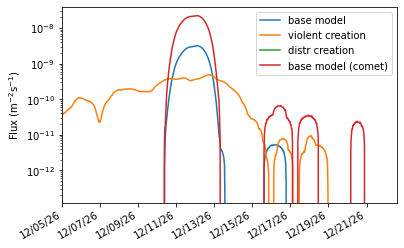

2026 DEC 12 03:04:26.898


In [34]:
# cmor = np.genfromtxt("21_wolf/geminids_zhr/cmor/cmor.txt", delimiter = ',')

fig = plt.figure()
ax = fig.add_subplot(111)

x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

order = np.argsort(long)

# peak = np.argmax(cmor[:,1])
d = 1
# mean = np.mean(cmor[peak-d:peak+d,1])

plt.plot(x2, r_m7_nv*norm_nv, label = "base model")
plt.plot(x2, r_m7_v*norm_v, label = "violent creation")
plt.plot(x2, r_m7_d*norm_d, label = "distr creation")
plt.plot(x2, r_m7_nvc*normc, label = "base model (comet)")

plt.yscale("log")

# plt.plot([262.15, 262.15], [0,1], "r--", label="peak")


# plt.plot(long[order]/2/np.pi*360 +180, r_m4_nv[order]/np.max(r_m4_nv), label = "1e-4 g min mass")
# plt.plot(cmor[:,0], cmor[:,1]/mean, label = 'cmor')
# plt.xlim(257,262)


# lns = l1+l2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)

# x = mdates.datestr2num("Dec 14, 2018, 11:30 AM")


# plt.plot([x,x], [0, 3e-4], "r--")

plt.ylabel("Flux (m$^{-2}$s$^{-1}$)")
plt.xlim(x2[0],x2[1000])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig("../figures/Destiny.png")
plt.show()
print(spice.et2utc(t[np.argmax(r_m7_nv)], "C", 3))

In [25]:
print(np.min(points1[:,3]))
print(np.min(points2[:,3]))
print(np.min(points3[:,3]))
print(np.min(points1c[:,3]))


3.276924444325116e-09
2.4114141843365246e-09


ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
a = 800
m = 10
n=10000

nm = 200
pos_arr = np.zeros((n,3))

n_part_m4_v = np.zeros(n)
r_m4_v = np.zeros(n)

n_part_m7_v = np.zeros((n,nm))
r_m7_v = np.zeros(n)

n_part_m4_nv = np.zeros(n)
r_m4_nv = np.zeros(n)

n_part_m7_nv = np.zeros((n,nm))
r_m7_nv = np.zeros(n)

n_part_m4_d = np.zeros(n)
r_m4_d = np.zeros(n)

n_part_m7_d = np.zeros((n,nm))
r_m7_d = np.zeros(n)







n_part_distr = np.zeros(n)
r_distr = np.zeros(n)

r = .03

t = t_d[np.linspace(0,19999, n, dtype=int)]
long = np.zeros(t.shape[0])
pts1 = points1[points1[:,3] > 1e-9]
pts2 = points2[points2[:,3] > 1e-9]
pts3 = points3[points3[:,3] > 1e-9]
vals = np.linspace(-9,-4,nm)


for i,j in enumerate(tqdm(np.linspace(0,19999, n, dtype=int))):
    [pos, lt] = spice.spkezr("-4614", t_d[j], "J2000", "NONE", "SUN")

    
    pos = spice.convrt(pos, "KM", "AU")
    pos_arr[i] = pos[:3]


#     n_part_m4_v[i] = len(particles_m4_v.query_ball_point(pos[:3], r))

    idxes1 = particles_m7_nv.query_ball_point(pos[:3], r)
    if idxes1: n_part_m7_nv[i] = [np.sum(pts1[idxes1][:,3] > 10**k) for k in vals]

    idxes2 = particles_m7_v.query_ball_point(pos[:3], r)
    if idxes2: n_part_m7_v[i] = [np.sum(pts2[idxes2][:,3] > 10**k) for k in vals]

    idxes3 = particles_m7_d.query_ball_point(pos[:3], r)
    if idxes3: n_part_m7_d[i] = [np.sum(pts3[idxes3][:,3] > 10**k) for k in vals]        

# #     n_part_distr[i] = len(particles3.query_ball_point(pos[:3], r))

# #     n_part_m4_nv[i] = len(particles_m4_nv.query_ball_point(pos[:3], r))
#     n_part_m7_nv[i] = particles_m7_nv.query_ball_point(pos[:3], r)
    
# #     n_part_m4_d[i] = len(particles_m4_d.query_ball_point(pos[:3], r))
#     n_part_m7_d[i] = particles_m7_d.query_ball_point(pos[:3], r)
    
# #     n_part_a_nv[i] = len(particles_a_nv.query_ball_point(pos[:3], r))

    pos = spice.convrt(pos, "AU", "M")


    V = 4/3 * np.pi * ((r*au)**3)
    
    
    

#     r_m4_v[i] = n_part_m4_v[i]/V *35e3
#     r_m7_v[i] = n_part_m7_v[i]/V *35e3


# # #                     #n/a     #m^-3 #na.         #m^2                                 #m/s
# #     r_distr[i] = n_part_distr[i]/V * norm3 * (np.pi*RADIUS_EARTH**2/au**2) * np.sqrt(np.sum((pos[3:]-earth)**2))
#     r_m4_nv[i] = n_part_m4_nv[i]/V *35e3

#     r_m7_nv[i] = n_part_m7_nv[i]/V *35e3
    
#     r_m4_d[i] = n_part_m4_d[i]/V *35e3
#     r_m7_d[i] = n_part_m7_d[i]/V *35e3
    
#     r_a_nv[i] = n_part_a_nv[i]/V * norm * (np.pi*RADIUS_EARTH**2) * np.sqrt(np.sum((pos[3:]-earth)**2))


    [pos_eclip, lt] = spice.spkezr("-4614", t_d[j], "ECLIPJ2000", "NONE", "SUN")
    rad, long[i], lat = spice.reclat(pos_eclip[:3])
    
    
    

In [26]:
    r_m7_v = n_part_m7_v/V *35e3*norm_v


# # #                     #n/a     #m^-3 #na.         #m^2                                 #m/s
#     r_m4_nv[i] = n_part_m4_nv[i]/V *35e3

    r_m7_nv = n_part_m7_nv/V *35e3 * norm_nv
    
#     r_m4_d[i] = n_part_m4_d[i]/V *35e3
    r_m7_d = n_part_m7_d/V *35e3 * norm_d

NameError: name 'norm_v' is not defined

In [27]:
maxes_v = np.zeros(vals.size)
maxes_nv = np.zeros(vals.size)
maxes_d = np.zeros(vals.size)


for i in tqdm(range(vals.size)):
#     x2 = np.array([t2[i*100] for i in range(800)])
#     x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

#     order = np.argsort(long)
#     plt.plot(long[order]/2/np.pi*360 + 180, n_part_m7_v[:,i][order]/np.max(n_part_m7_v[:,i]), label = f"{i}")
#     plt.legend()
#     plt.xlim(255,265)

    maxes_v[i] = np.max(r_m7_v[:,i])
    maxes_nv[i] = np.max(r_m7_nv[:,i])
#     maxes_d[i] = np.max(r_m7_d[:,i])


plt.plot(vals, np.log10(maxes_nv), label = "Base Model")
plt.plot(vals, np.log10(maxes_v), label = "Violent Creation")
plt.plot(vals, np.log10(maxes_d), label = "Distributed Creation")
plt.xlabel("$\log_{10}$ (Limiting Mass (g))")
plt.ylabel("$\log_{10}$ (Flux m$^{-2}$s$^{-1}$")
# plt.yscale("log")
plt.legend()
plt.xlim(-12,-4)
plt.ylim(-12, -8)
plt.savefig("Figures/lim_mass_peak_time.png")




NameError: name 'vals' is not defined

In [28]:
# vals

In [ ]:
# 10**vals

In [ ]:
# points_m7.shape

In [ ]:
# n_part_m7_v

In [ ]:
# points2.shape()

In [ ]:
# n_part_m7_v[n_part_m7_v[:,0]>0]